In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [83]:
df = pd.read_csv('dominican_republic_casualities.csv')
df.head()

,FullName,Age,DateFirstSymptoms,ActivityPriorToIllness,IllnessSymptoms,DateOfDeath,CauseOfDeath,LocationName,LocatationLat,LocationLng,AutopsyPerformed,ResultsOfAutopsyReleased,Hometown,Notes
0,Khalid Adkins,46.0,2019-06-23,NaN,Profusely sweating; Vomiting; Leg Swelling,2019-6-25,Kidney Failure,NaN,NaN,NaN,NaN,NaN,"Denver, CO",NaN
1,Susan Simoneaux,59.0,2019-05-24,Honey moon in Dominican Republic,Difficulty Breathing,2018-6-19,NaN,NaN,NaN,NaN,NaN,NaN,LA,Died one week after returning
2,Vittorio Caruso,56.0,2019-06-11,Drinking from minibar,Coughing; Shortness of Breath; Respiratory dis...,2019-6-17,Heart Attack; Respiratory Failure,Boca Chica Village (not resort),18.451602,-69.615992,NaN,NaN,"Long Island, NY",NaN
3,Joseph Allen,55.0,NaN,Swimming,Pungent smell; unable to speak; upset stomach,2019-6-13,Heart Attack; Pulmonary Edema,Terra Linda Resort,19.765169,-70.517003,1.0,0.0,NJ,Prior heart issues that include hardening of t...
4,Leyla Cox,53.0,NaN,NaN,NaN,2019-6-11,Heart Attack,Excellence Punta Cana,18.820204,-68.602992,NaN,0.0,"Staten Island, NY",felt unwell and was taken to the hospital. But...


In [49]:
df.columns

Index(['FullName', 'Age', 'DateFirstSymptoms', 'ActivityPriorToIllness',
       'IllnessSymptoms', 'DateOfDeath', 'CauseOfDeath', 'LocationName',
       'LocatationLat', 'LocationLng', 'AutopsyPerformed',
       'ResultsOfAutopsyReleased', 'Hometown', 'Notes'],
      dtype='object')

In [50]:
df['IllnessSymptoms'].unique()

array(['Profusely sweating; Vomiting; Leg Swelling',
       'Difficulty Breathing',
       'Coughing; Shortness of Breath; Respiratory distress; Chest pain',
       'Pungent smell; unable to speak; upset stomach', nan,
       'Severely ill', 'Severely ill; blood in stool in urine',
       'Vomiting', 'Unable to talk; sit up',
       'Feeling ill; severe headache', 'Felt Ill',
       'Vomiting; Diarrhea; Stomach ache; Unconscious', 'Vomited Blood',
       'Drooling excessively; profusely sweating'], dtype=object)

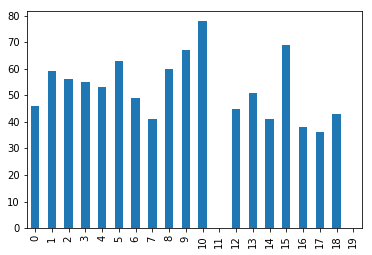

In [101]:
plt.figure()
df["Age"].plot(kind="bar")

In [104]:
def generateBaseMap(default_location=[18.4800103,-70.0170515], default_zoom_start=6):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [105]:
base_map = generateBaseMap()
base_map

In [123]:
base_map = generateBaseMap()
HeatMap(data=df[['LocatationLat', 'LocationLng']].groupby(['LocatationLat', 'LocationLng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

base_map

In [124]:
base_map = generateBaseMap()
HeatMap(data=df[['LocatationLat', 'LocationLng']].groupby(['LocatationLat', 'LocationLng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

folium.Marker([18.451602, -69.615992], popup='Boca Chica Village').add_to(base_map)
folium.Marker([19.765169, -70.517003], popup='Terra Linda Resort').add_to(base_map)

base_map

In [125]:
df_locations = df[['LocationName','LocatationLat','LocationLng']]
locations = df_locations.dropna()

locations

,LocationName,LocatationLat,LocationLng
2,Boca Chica Village (not resort),18.451602,-69.615992
3,Terra Linda Resort,19.765169,-70.517003
4,Excellence Punta Cana,18.820204,-68.602992
5,Playa Nueva Romana Hotel,18.434173,-69.200235
6,Playa Nueva Romana Hotel,18.434173,-69.200235
7,Luxury Bahia Principe Bouganville,18.434173,-69.193669
9,Hard Rock Hotel & Casino in Punta Cana,18.733367,-68.484937
10,Dreams Resort Punta Cana,18.803896,-68.576480
11,Bahia Principe Resort in Punta Canana,18.724676,-68.467651
12,Hard Rock Hotel & Casino in Punta Cana,18.733367,-68.484937
